In [1]:
import numpy as np
from scipy.misc import imshow, imsave, imread, imresize
from scipy.ndimage import filters, morphology
from skimage import filters
from skimage.draw import line
from scipy import ndimage, spatial
import matplotlib.pyplot as plt

In [2]:
def houghLines(img):
    w,h = img.shape
    acc=[]
    for i in range(h):
        rr,cc = line(0, i, w-1, h-i-1)
        acc.append(np.sum(img[rr, cc]))
    mi = np.argmax(acc)
    ret = np.zeros(img.shape, dtype=np.bool)
    rr,cc = line(0, mi, w-1, h-mi-1)
    ret[rr,cc]=True
    return ret

In [3]:
def removeLines(img):
    imfft = np.fft.fft2(img)
    imffts = np.fft.fftshift(imfft)

    mags = np.abs(imffts)
    angles = np.angle(imffts)

    visual = np.log(mags)


    visual3 = np.abs(visual.astype(np.int16) - np.mean(visual))

    ret = houghLines(visual3)
    ret = morphology.binary_dilation(ret )
    ret = morphology.binary_dilation(ret )
    ret = morphology.binary_dilation(ret )
    ret = morphology.binary_dilation(ret )
    ret = morphology.binary_dilation(ret )
    w,h=ret.shape
    ret[int(w/2-3):int(w/2+3), int(h/2-3):int(h/2+3)]=False


    delta = np.mean(visual[ret]) - np.mean(visual)


    visual_blured = ndimage.gaussian_filter(visual, sigma=5)



    visual[ret] =visual_blured[ret]


    newmagsshift = np.exp(visual)

    newffts = newmagsshift * np.exp(1j*angles)

    newfft = np.fft.ifftshift(newffts)

    imrev = np.fft.ifft2(newfft)

    newim2 =  np.abs(imrev).astype(np.uint8)


    newim2 = np.maximum(newim2, img)

    return newim2

In [4]:
img = imread('../data/medium/107_img.png', mode='L')

/Users/reiffd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


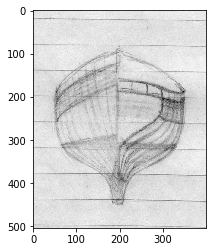

In [5]:
plt.imshow(img, cmap='gray')

In [6]:
imffts = houghLines(img)

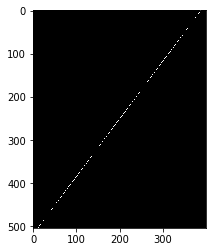

In [7]:
plt.imshow(houghLines(img), cmap='gray')

In [8]:
imfft = np.fft.fft2(img)
imffts = np.fft.fftshift(imfft)

In [9]:
mags = np.abs(imffts)
angles = np.angle(imffts)

In [10]:
visual = np.log(mags)
visual3 = np.abs(visual.astype(np.int16) - np.mean(visual))

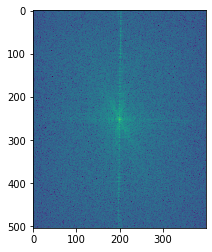

In [11]:
plt.imshow(visual)

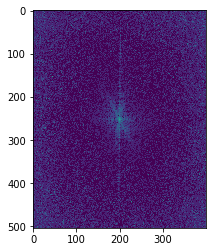

In [12]:
plt.imshow(visual3)

In [13]:
ret = houghLines(visual3)
ret = morphology.binary_dilation(ret )
ret = morphology.binary_dilation(ret )
ret = morphology.binary_dilation(ret )
ret = morphology.binary_dilation(ret )
ret = morphology.binary_dilation(ret )

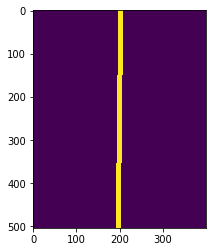

In [14]:
plt.imshow(ret)

In [15]:
w,h=ret.shape

In [16]:
ret[int(w/2-3):int(w/2+3), int(h/2-3):int(h/2+3)]=False


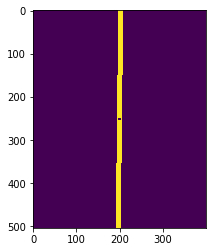

In [17]:
plt.imshow(ret)

In [18]:
delta = np.mean(visual[ret]) - np.mean(visual)
visual_blured = ndimage.gaussian_filter(visual, sigma=5)
visual[ret] =visual_blured[ret]
newmagsshift = np.exp(visual)

In [19]:
newffts = newmagsshift * np.exp(1j*angles)
newfft = np.fft.ifftshift(newffts)
imrev = np.fft.ifft2(newfft)
newim2 =  np.abs(imrev).astype(np.uint8)
newim2 = np.maximum(newim2, img)

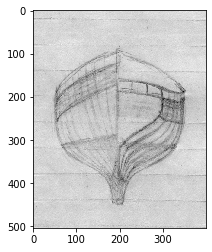

In [20]:
plt.imshow(newim2, cmap='gray')

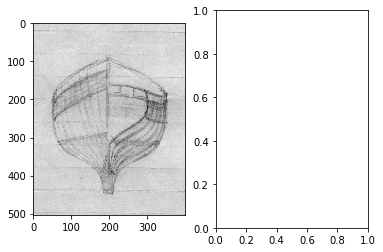

In [21]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(removeLines(img), cmap='gray')

In [25]:
def compare_to_FT(clean_img_path, dirty_img_path, rf_img_path):
    rf = imread(rf_img_path, mode='L')
    clean = imread(clean_img_path, mode='L')
    img = imread(dirty_img_path, mode='L')
    ft_clean = removeLines(img)
    fig, ax = plt.subplots(1, 4, figsize=(20, 20))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original', fontsize=30)
    ax[0].set_axis_off()
    ax[1].imshow(clean, cmap='gray')
    ax[1].set_title('CNN', fontsize=30)
    ax[1].set_axis_off()
    ax[2].imshow(ft_clean, cmap='gray')
    ax[2].set_title('Fourier Transform', fontsize=30)
    ax[2].set_axis_off()
    ax[3].imshow(rf, cmap='gray')
    ax[3].set_title('Random Forest', fontsize=30)
    ax[3].set_axis_off()
    

In [26]:
clean_img_path = '../results/320_img_moredata_CNN_E100_Batch10_Filters64_Neurons64_Actrelu_Layers_3.h5_0.55_test_after.png'
dirty_img_path = '../results/320_img_moredata_CNN_E100_Batch10_Filters64_Neurons64_Actrelu_Layers_3.h5_0.55_test_before.png'
rf_img_path = '../results/320_img_RF_Model_FLAT.png'

/Users/reiffd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/reiffd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/reiffd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


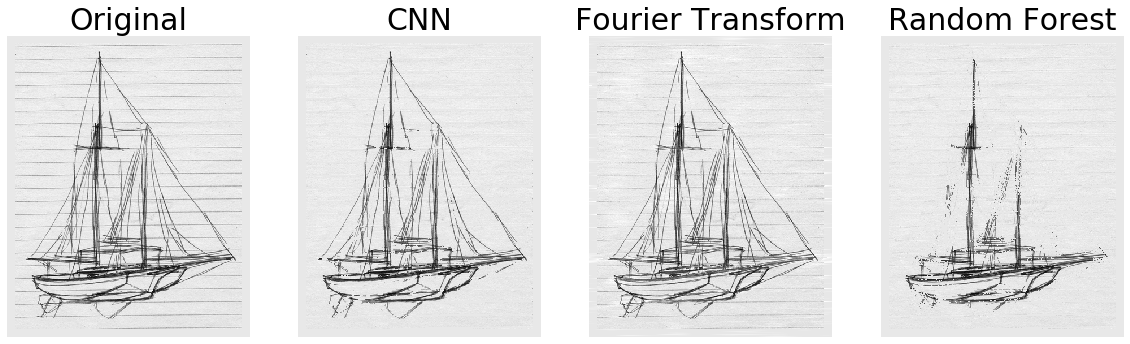

In [27]:
compare_to_FT(clean_img_path, dirty_img_path, rf_img_path)